In [26]:
import pandas as pd
from opensky_api import OpenSkyApi
import requests
import matplotlib.pyplot as plt
%matplotlib inline

#from shapely.geometry import Point
#import geopandas

# Data 
## Airlines

https://openflights.org/data.html

In [27]:
df_airlines = pd.read_csv("data/airlines.dat", names=['id','name','alias','iata','icao','callsign','country','active'])
df_airlines.head()

,id,name,alias,iata,icao,callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


## Aircraft database
https://opensky-network.org/datasets/metadata/
Will give the model of the Aircrat

In [28]:
df_aircraft = pd.read_csv("data/aircraftDatabase.csv", low_memory=False)
df_aircraft.head(200)

,icao24,registration,manufacturericao,manufacturername,model,typecode,serialnumber,linenumber,icaoaircrafttype,operator,...,status,built,firstflightdate,seatconfiguration,engines,modes,adsb,acars,notes,categoryDescription
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,aa3487,N757F,NaN,Raytheon Aircraft Company,A36,NaN,E-3121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
2,ae267b,6533,VOUGHT,Aerospatiale,MH-65C Dolphin,AS65,6182,NaN,H2T,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,No ADS-B Emitter Category Information
3,a4fa61,N42MH,NaN,Piper,PA-31-350,NaN,31-7852015,NaN,NaN,NaN,...,NaN,1977-01-01,NaN,NaN,LYCOMING TI0-540 SER,False,False,False,NaN,NaN
4,c04101,C-FYQA,NaN,Champion Aircraft Corporation,7GCA (Champion),NaN,420,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
5,391927,F-GGJH,ROBIN,Robin,DR.400 160 Chevalier,DR40,1795,NaN,L1P,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
6,a61cf6,N493TR,CIRRUS,Cirrus Design Corp,SR22T,S22T,0776,NaN,L1P,NaN,...,NaN,2014-01-01,NaN,NaN,CONT MOTOR TSIO-550-K,False,False,False,NaN,Light (< 15500 lbs)
7,503c21,LY-KNA,NaN,Impulse Aircraft,Impulse 100,ZZZZ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,Ultralight / hang-glider / paraglider
8,aa6735,N77FK,GULFSTREAM AEROSPACE,Gulfstream Aerospace,G-IV,GLF4,1357,NaN,L2J,NaN,...,NaN,1998-01-01,NaN,NaN,ROLLS-ROYC TAY 611SER,False,False,False,NaN,Small (15500 to 75000 lbs)
9,3d3191,D-ERAF,GROB,Grob,G-115 E,G115,82085/E,NaN,L1P,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN


# Flights now bbox France

In [29]:
#bboxFrance= [min_latitude, max_latitude, min_longitude, max_latitude]
bboxFrance= [41, 52, -5.5, 10]

import time
from datetime import datetime, timedelta
t = int(time.time())
print(t)
print(datetime.fromtimestamp(t).strftime("%d/%m/%Y %H:%M"))

1554065038
31/03/2019 22:43


In [30]:
#  fly data
# states values :'icao24','callsign','origin_country','time_position','last_contact','longitude','latitude',
#'geo_altidude','on_ground','velocity','heading','vertical_rate','sensors','baro_altitude',
# 'squawk','spi','position_source'
datafull =[]
api = OpenSkyApi()
states = api.get_states(time_secs= t, bbox=bboxFrance)
for s in states.states:
    #print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.velocity, s.callsign))
    if s.latitude != None and s.longitude != None and s.on_ground != True:
       #data.append(( s.callsign, float(s.longitude), float(s.latitude) ))
        datafull.append((s.icao24,s.callsign))
    else :
        pass
print(datafull[0:5]) 
print("Aircrafts actually on France : " +str(len(datafull)))

[('4b1804', 'SWR2030 '), ('4b1809', 'SWR250Q '), ('4b1800', 'SWR2049 '), ('3c6669', 'DLH59P  '), ('44028c', 'EJU3828 ')]
Aircrafts actually on France : 540


In [31]:
df = pd.DataFrame(datafull,columns =['icao24','callsign'])
df['aircraft_model'] = df['icao24']
df['airlines_icao'] = df['callsign'].apply(lambda x: x[0:3])
df['airlines_name'] = df['airlines_icao']
df['airlines_country'] = df['airlines_icao']
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1804,SWR2030,4b1804,SWR,SWR,SWR
1,4b1809,SWR250Q,4b1809,SWR,SWR,SWR
2,4b1800,SWR2049,4b1800,SWR,SWR,SWR
3,3c6669,DLH59P,3c6669,DLH,DLH,DLH
4,44028c,EJU3828,44028c,EJU,EJU,EJU


In [32]:
a = df_aircraft.set_index('icao24')['typecode']
df["aircraft_model"] = df["aircraft_model"].replace(a)

In [33]:
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1804,SWR2030,NaN,SWR,SWR,SWR
1,4b1809,SWR250Q,NaN,SWR,SWR,SWR
2,4b1800,SWR2049,NaN,SWR,SWR,SWR
3,3c6669,DLH59P,A321,DLH,DLH,DLH
4,44028c,EJU3828,NaN,EJU,EJU,EJU


In [34]:
a = df_airlines.set_index('icao')['name']
df["airlines_name"] = df["airlines_name"].replace(a)

In [35]:
a = df_airlines.set_index('icao')['country']
df["airlines_country"] = df["airlines_country"].replace(a)

In [36]:
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1804,SWR2030,NaN,SWR,Swissair,Switzerland
1,4b1809,SWR250Q,NaN,SWR,Swissair,Switzerland
2,4b1800,SWR2049,NaN,SWR,Swissair,Switzerland
3,3c6669,DLH59P,A321,DLH,Lufthansa,Germany
4,44028c,EJU3828,NaN,EJU,EJU,EJU


In [37]:
by_airlines = df.groupby('airlines_name')['callsign'].nunique()

In [38]:
result = by_airlines[by_airlines > 10].sort_values(ascending = False)
print(result.head())

airlines_name
Ryanair             57
easyJet             47
EJU                 37
British Airways     33
Vueling Airlines    28
Name: callsign, dtype: int64


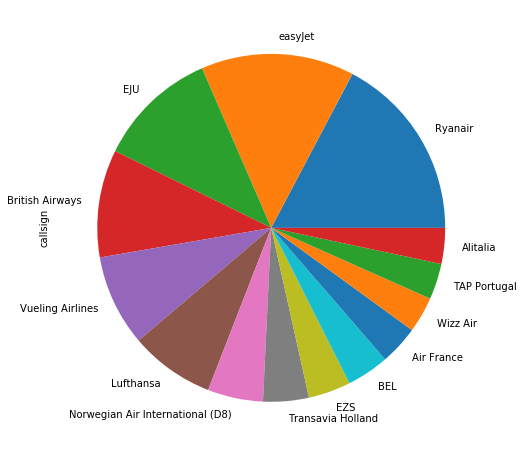

In [39]:
result.plot.pie(figsize=(8, 8))

In [40]:
by_country = df.groupby('airlines_country')['callsign'].nunique()

In [41]:
result_country = by_country[by_country > 10].sort_values(ascending = False)
print(result_country.head())

airlines_country
United Kingdom    98
Ireland           65
Spain             41
Germany           37
EJU               37
Name: callsign, dtype: int64


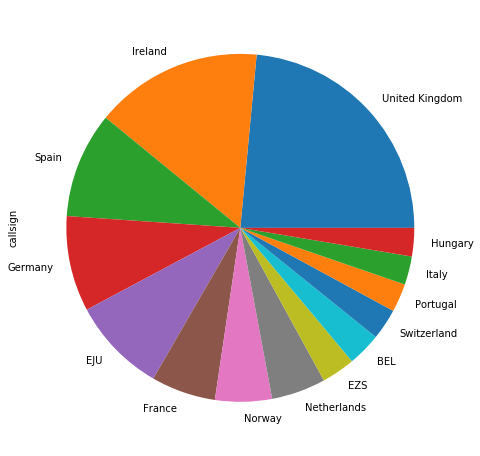

In [42]:
result_country.plot.pie(figsize=(8, 8))

In [43]:
df['aircraft_model']= df['aircraft_model'].astype(str)
#df['aircraft_model'] = df['aircraft_model'].apply(lambda x: x[0:-4])
df.head(80)

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1804,SWR2030,nan,SWR,Swissair,Switzerland
1,4b1809,SWR250Q,nan,SWR,Swissair,Switzerland
2,4b1800,SWR2049,nan,SWR,Swissair,Switzerland
3,3c6669,DLH59P,A321,DLH,Lufthansa,Germany
4,44028c,EJU3828,nan,EJU,EJU,EJU
5,3c6667,DLH58H,A321,DLH,Lufthansa,Germany
6,3c6663,DLH44K,A321,DLH,Lufthansa,Germany
7,3c6677,DLH8AM,A321,DLH,Lufthansa,Germany
8,3c666a,DLH55X,A321,DLH,Lufthansa,Germany
9,3c666b,DLH1308,A321,DLH,Lufthansa,Germany


In [44]:
by_model = df.groupby('aircraft_model')['callsign'].nunique()

In [54]:
result_model = by_model[by_model > 3].sort_values(ascending = False)
print(result_model.head())

aircraft_model
A320    136
B738    115
nan      57
A319     55
A321     32
Name: callsign, dtype: int64


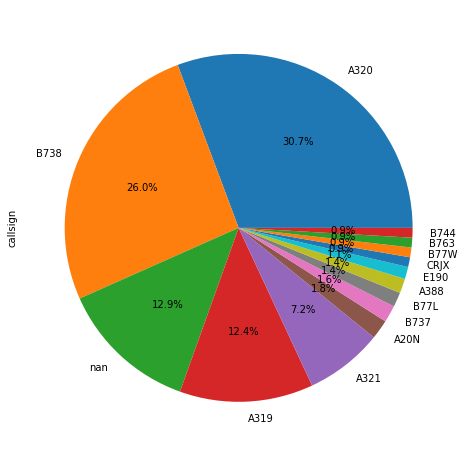

In [55]:
result_model.plot.pie(figsize=(8, 8),autopct='%1.1f%%')